In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from pandas import DataFrame
from IPython.display import HTML
#HTML(DataFrame(MYDATA).to_html())
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [5]:
import sys
sys.path.append('/home/maghoi/fastai/old/')

In [6]:
from fastai_v7.imports import *
from fastai_v7.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
set_plot_sizes(12,14,16)

In [7]:
#from fastai.imports import *
#from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [8]:
!ls main/data

ls: cannot access 'main/data': No such file or directory


In [9]:
path = "/home/maghoi/main/data/complexes.csv"

In [10]:
df_raw = pd.read_csv(path, low_memory=False)

In [11]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [12]:
df_raw = df_raw.drop("Unnamed: 0", axis = 1)

In [13]:
df_raw = df_raw.set_index(df_raw.iloc[:,0]).drop("key_0", axis = 1)

In [14]:
display_all(df_raw.tail())

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
key_0                                                                          
5men_0p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5   4   4   4   5   7   
5men_0p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5   4   4   4   5   7   
5men_0p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5   4   4   4   5   7   
5men_0p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5   4   4   4   5   7   
5men_0p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5   4   4   4   5   7   

                            15  16  17  18  19  20  21  22  23  24  25  26  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   6   5   6   5   7   5   6   4   4   4   6   7   
5men_0p_N2_1t_99s_pMHC-TCR   6   5   6   5   7   5   6   4   4   4   6   7   
5men_0p_N3_1t_99s_pMHC-TCR   6   5   6   5   7   5   6   4   4   4   6   7   
5men_0p_R1_1t_99s_pMHC-TCR   6   5   6   5   7   5   6   4   4   4   6   7   
5men_0p_S1_1t_99s_pMHC-TCR   6   5   6   5   7   5   6   4   4   4   6   7   

                            27  28  29  30  31  32  33  34  35  36  37  38  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   4   6   6   5   5   6   4   5   6   6   4   6   
5men_0p_N2_1t_99s_pMHC-TCR   4   6   6   5   5   6   4   5   6   6   4   6   
5men_0p_N3_1t_99s_pMHC-TCR   4   6   6   5   5   6   4   5   6   6   4   6   
5men_0p_R1_1t_99s_pMHC-TCR   4   6   6   5   5   6   4   5   6   6   4   6   
5men_0p_S1_1t_99s_pMHC-TCR   4   6   6   5   5   6   4   5   6   6   4   6   

                            39  40  41  42  43  44  45  46  47  48  49  50  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   4   4   4   5   5   5   5   7   5   4   7  11   
5men_0p_N2_1t_99s_pMHC-TCR   4   4   4   5   5   5   5   7   5   4   7  11   
5men_0p_N3_1t_99s_pMHC-TCR   4   4   4   5   5   5   5   7   5   4   7  11   
5men_0p_R1_1t_99s_pMHC-TCR   4   4   4   5   5   5   5   7   5   4   7  11   
5men_0p_S1_1t_99s_pMHC-TCR   4   4   4   5   5   5   5   7   5   4   7  11   

                            51  52  53  54  55  56  57  58  59  60  61  62  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   4   5   5   5   6   1   7   5   7  11   6   6   
5men_0p_N2_1t_99s_pMHC-TCR   4   5   5   5   6   1   7   5   7  11   6   6   
5men_0p_N3_1t_99s_pMHC-TCR   4   5   5   5   6   1   7   5   7  11   6   6   
5men_0p_R1_1t_99s_pMHC-TCR   4   5   5   5   6   1   7   5   7  11   6   6   
5men_0p_S1_1t_99s_pMHC-TCR   4   5   5   5   6   1   7   5   7  11   6   6   

                            63  64  65  66  67  68  69  70  71  72  73  74  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   5   5   5   5   4   5   4   8   4   5   5   8   
5men_0p_N2_1t_99s_pMHC-TCR   5   5   5   5   4   5   4   8   4   5   5   8   
5men_0p_N3_1t_99s_pMHC-TCR   5   5   5   5   4   5   4   8   4   5   5   8   
5men_0p_R1_1t_99s_pMHC-TCR   5   5   5   5   4   5   4   8   4   5   5   8   
5men_0p_S1_1t_99s_pMHC-TCR   5   5   5   5   4   5   4   8   4   5   5   8   

                            75  76  77  78  79  80  81  82  83  84  85  86  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   5   4   6   4   6   5   4   5   6   7   7   6   
5men_0p_N2_1t_99s_pMHC-TCR   5   4   6   4   6   5   4   5   6   7   7   6   
5men_0p_N3_1t_99s_pMHC-TCR   5   4   6   4   6   5   4   5   6   7   7   6   
5men_0p_R1_1t_99s_pMHC-TCR   5   4   6   4   6   5   4   5   6   7   7   6   
5men_0p_S1_1t_99s_pMHC-TCR   5   4   6   4   6   5   4   5   6   7   7   6   

                            87  88  89  90  91  92  93  94  95  96  97  98  \
key_0                                                                        
5men_0p_N1_1t_99s_pMHC-TCR   

In [15]:
df_raw.describe(include="all")

0            1       2       3            4       5       6  \
count  1464.000000  1464.000000  1464.0  1464.0  1464.000000  1464.0  1464.0   
mean      5.036885     4.170765     8.0     4.0     4.901639     5.0     7.0   
std       2.898606     1.380290     0.0     0.0     0.486198     0.0     0.0   
min      -4.000000    -1.000000     8.0     4.0     2.000000     5.0     7.0   
25%       6.000000     4.000000     8.0     4.0     5.000000     5.0     7.0   
50%       6.000000     4.000000     8.0     4.0     5.000000     5.0     7.0   
75%       6.000000     4.000000     8.0     4.0     5.000000     5.0     7.0   
max       6.000000     7.000000     8.0     4.0     5.000000     5.0     7.0   

                 7            8       9  ...     459          460     461  \
count  1464.000000  1464.000000  1464.0  ...  1464.0  1464.000000  1464.0   
mean      5.983607     5.187842     5.0  ...     6.0     1.842213     6.0   
std       0.579678     2.252870     0.0  ...     0.0     2.791030     0.0   
min       3.000000    -3.000000     5.0  ...     6.0    -2.000000     6.0   
25%       6.000000     5.000000     5.0  ...     6.0    -1.000000     6.0   
50%       6.000000     6.000000     5.0  ...     6.0     2.000000     6.0   
75%       6.000000     6.000000     5.0  ...     6.0     4.000000     6.0   
max       7.000000     7.000000     5.0  ...     6.0     7.000000     6.0   

               462          463     464          465          466  \
count  1464.000000  1464.000000  1464.0  1464.000000  1464.000000   
mean      3.520492     4.760929     4.0     3.568989     3.841530   
std       1.832602     0.864870     0.0     1.787981     0.365306   
min       1.000000     1.000000     4.0     1.000000     3.000000   
25%       1.000000     5.000000     4.0     1.000000     4.000000   
50%       5.000000     5.000000     4.0     5.000000     4.000000   
75%       5.000000     5.000000     4.0     5.000000     4.000000   
max       5.000000     5.000000     4.0     5.000000     4.000000   

               467       y_true  
count  1464.000000  1464.000000  
mean      1.062158     0.166667  
std       3.359050     0.372805  
min      -4.000000     0.000000  
25%      -4.000000     0.000000  
50%       1.000000     0.000000  
75%       4.000000     0.000000  
max       4.000000     1.000000  

[8 rows x 469 columns]

## Random forest

In [16]:
df = df_raw.drop("y_true", axis = 1)
y = df_raw.y_true

In [17]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9904590163934426

## Split vals

In [18]:
len(df)

1464

In [19]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 300  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1164, 468), (1164,), (300, 468))

In [20]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid")
    print(res)

In [22]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 294 ms, sys: 0 ns, total: 294 ms
Wall time: 115 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.04186379485411743, 0.21756225162774287, 0.9873814432989692, 0.6592]


## Bagging

In [23]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.04196627675741232, 0.23937418407171643, 0.987319587628866, 0.58744]


In [24]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1.0, 1.0)

In [25]:
preds.shape

(10, 300)

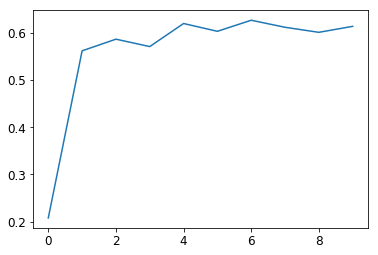

In [760]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [761]:
m = RandomForestRegressor(n_estimators=8, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.0466327503162944, 0.19737865470545018, 0.9843427835051547, 0.7195]


## Draw tree

In [762]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.26856485328287016, 0.3368842775869728, 0.4806850209842778, 0.18286468130586397]


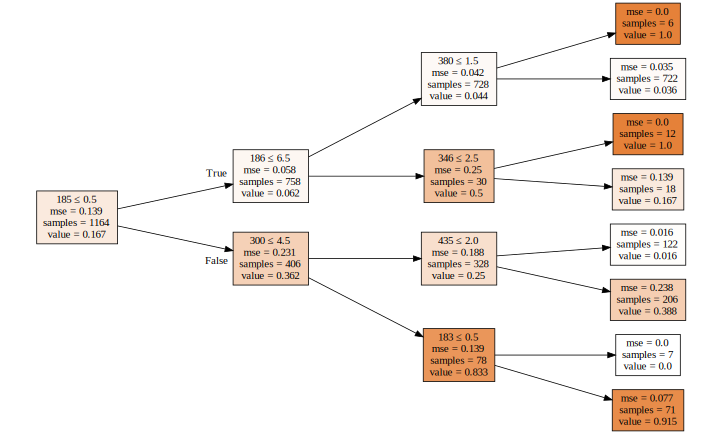

In [763]:
draw_tree(m.estimators_[0], df_trn, precision=3)

## Random forest out of bag validation achieves > 86 % accuracy

In [764]:
m = RandomForestRegressor(n_estimators=8, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.04691972379607169, 0.2066599461272874, 0.9841494845360825, 0.6925000000000001, 0.8779950557542605]


In [ ]:
## OOB error vs after out of bag

## Subsampling for increased accuracy ...

In [26]:
df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [27]:
set_rf_samples(800)

In [28]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maghoi/.conda/envs/fastai_py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 180 ms, sys: 4.34 ms, total: 185 ms
Wall time: 118 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.07155609627480622, 0.22501851775650217, 0.9631340206185567, 0.63544, 0.8748384324520186]


In [29]:
m = RandomForestRegressor(n_estimators=60, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.04826603918257049, 0.20198093052636504, 0.9832268041237113, 0.7062666666666668, 0.9281167379517601]


## Limit feature selection to 0.5 in trees. High?

In [30]:
m = RandomForestRegressor(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.05160649417030599, 0.18941796817268056, 0.9808247422680413, 0.74167, 0.9259699041397755]


# Currently at > 93 % accuracy ...

## Calculating confidence in tree predictions

In [31]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
print("Prediction certainty, standard deviation of predictions:")
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 41.8 ms, sys: 172 µs, total: 42 ms
Wall time: 41.2 ms
Prediction certainty, standard deviation of predictions:


(0.975, 0.15612494995995996)

In [32]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

## Feature importance in complex feature df

In [33]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid")
    print(res)

df_trn, y_trn = df, y
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
set_rf_samples(1000)
m = RandomForestRegressor(n_estimators=50, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [34]:
import sklearn.metrics as sk

In [35]:
y_hat = np.where(m.predict(X_valid) <= 0.5, 0, 1)

In [36]:
m.predict(X_train)
y_train
sk.matthews_corrcoef(y_valid, y_hat), sk.average_precision_score(y_valid, y_hat)

(0.8246893324021494, 0.763859649122807)

In [37]:
a = x.sort_values(by = "pred", ascending = False)

In [38]:
HTML(DataFrame(a.iloc[0:200, -3:]).to_html())

### Which sequence positions / amino acids matter (in complex)?

In [39]:
fi = rf_feat_importance(m, df_trn); fi[:10]

cols       imp
185  185  0.107527
186  186  0.090931
183  183  0.054662
181  181  0.048824
188  188  0.048112
184  184  0.042997
187  187  0.033538
240  240  0.027495
300  300  0.020202
189  189  0.018820

### Feature importance per position / amino acid 

In [40]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

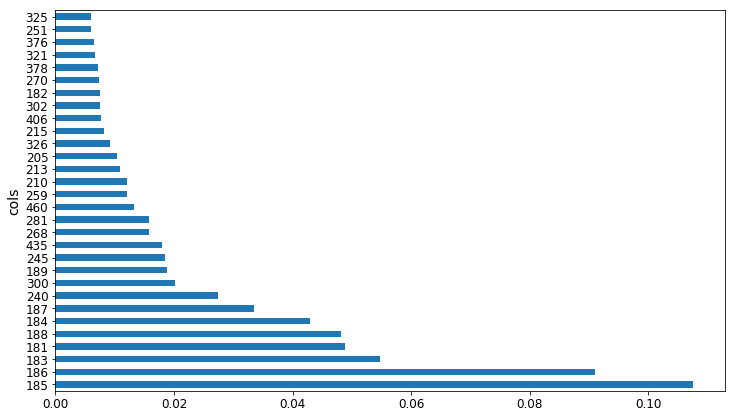

In [41]:
plot_fi(fi[:30]);

In [42]:
print("Number of features that have an importance:")
print(len(fi) - sum(fi.imp == 0))

Number of features that have an importance:
221


In [43]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

38

In [44]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

### Removing features and testing accuracy

In [45]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.10325472325752684, 0.19893284839721911, 0.9232369273000831, 0.7150651971656967, 0.8657304879923611]


### Number of features that have any importance: 234 / 469. Removing features < 0.005 importance -> to 38 reduces accuracy from ca 93 -> 89 %

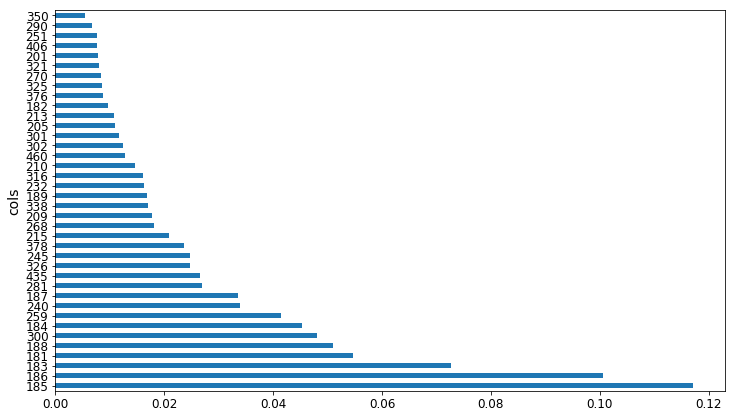

In [46]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [531]:
df_keep.shape, df.shape

((1464, 38), (1464, 468))

### Removing co-dependent features?

In [532]:
from scipy.cluster import hierarchy as hc

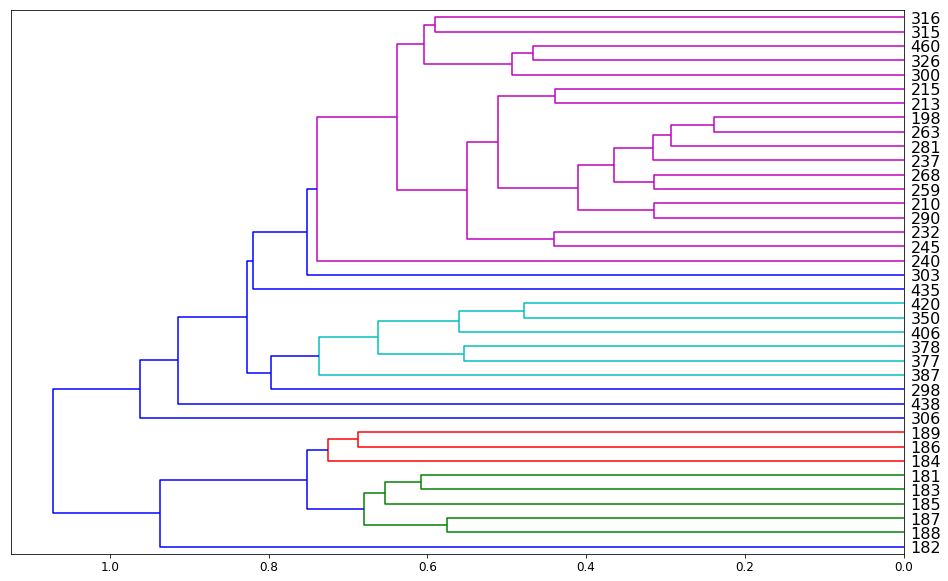

In [533]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Amino acid do not depend on each other. Thus no need for removal

## Partial dependence

In [534]:
from pdpbox import pdp
from plotnine import *

In [693]:
df_trn2, y_trn = df, y
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

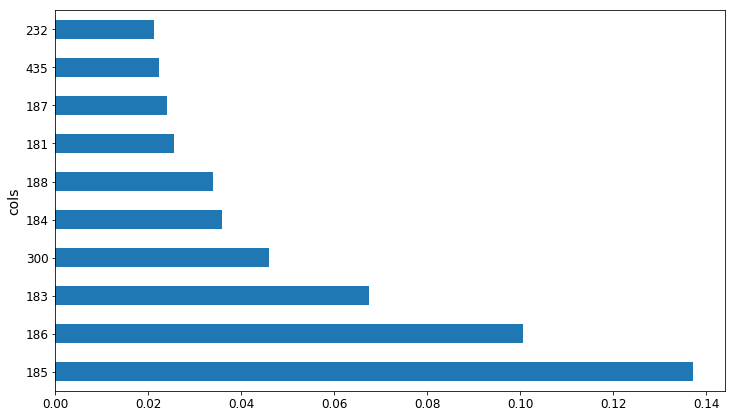

In [536]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

In [542]:
df

0  1  2  3  4  5  6  7  8  9  ...  458  459  460  \
key_0                                                     ...                  
1g6r_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1g6r_1p_P1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_90s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_P1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_95s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_P1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N2_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_N3_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_R1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1g6r_1p_S1_1t_99s_pMHC-TCR  6  7  8  4  4  5  7  6  4  5  ...    6    6    4   
1mwa_1p_P1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N2_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_N3_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_R1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
1mwa_1p_S1_1t_80s_pMHC-TCR  6 -1  8  4  2  5  7  6 -1  5  ...    6    6   -1   
...                        .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...   
5hho_4p_P1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N2_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_N3_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_R1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5hho_4p_S1_1t_99s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    7   
5men_0p_P1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_80s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    4   
5men_0p_P1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N2_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_N3_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    2   
5men_0p_R1_1t_90s_pMHC-TCR  6  4  8  4  5  5  7  6  6  5  ...    6    6    0   
5men_0p_S1_1t_90s_pMHC-TCR  

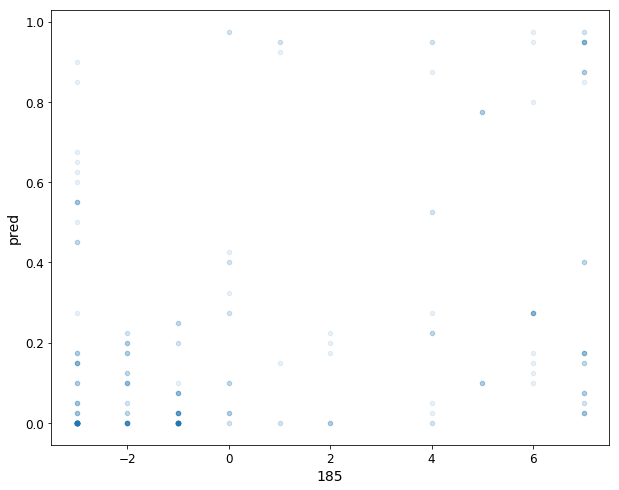

In [547]:
x.plot('185', 'pred', 'scatter', alpha=0.1, figsize=(10,8));

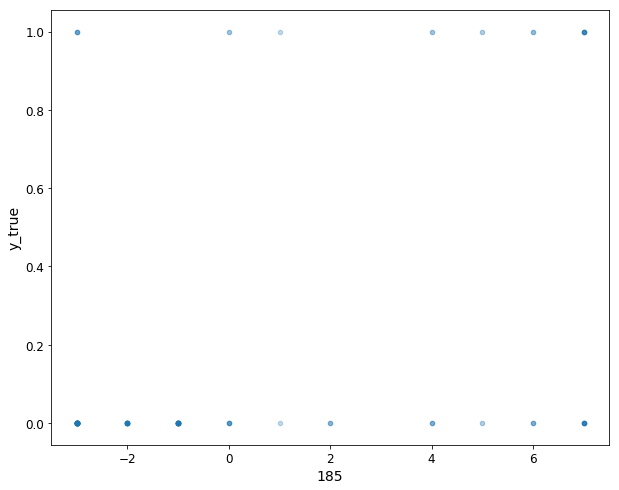

In [548]:
x.plot('185', 'y_true', 'scatter', alpha=0.1, figsize=(10,8));

In [549]:
x_all = get_sample(df_raw, 500)

In [576]:
from skmisc import *
import sys
sys.path.insert(0, "/usr/local/anaconda3/lib/python3.6/site-packages")

In [584]:
fi[0:10]

cols       imp
0   185  0.136056
1   186  0.093633
2   183  0.075726
5   188  0.049391
7   184  0.041288
24  215  0.040571
3   300  0.037237
4   181  0.036819
6   187  0.036319
10  240  0.028995

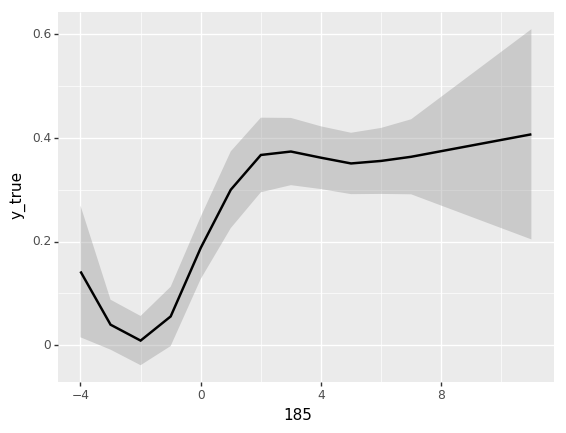

<ggplot: (8766313834255)>

In [585]:
ggplot(x_all, aes('185', 'y_true'))+stat_smooth(se=True, method='loess')

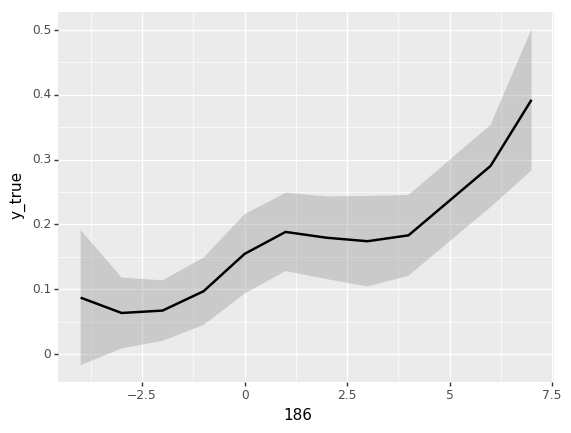

<ggplot: (-9223363270540941971)>

In [586]:
ggplot(x_all, aes('186', 'y_true'))+stat_smooth(se=True, method='loess')

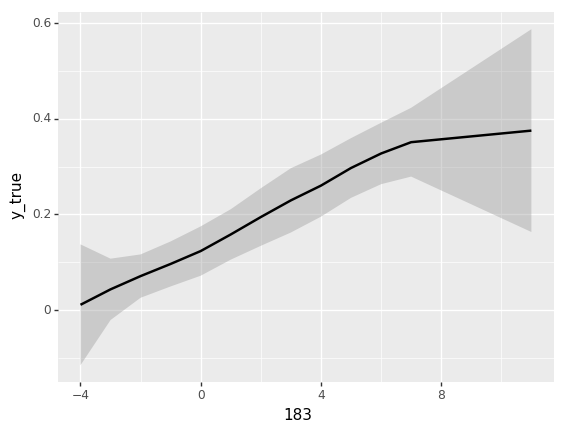

<ggplot: (-9223363270555590284)>

In [587]:
ggplot(x_all, aes('183', 'y_true'))+stat_smooth(se=True, method='loess')

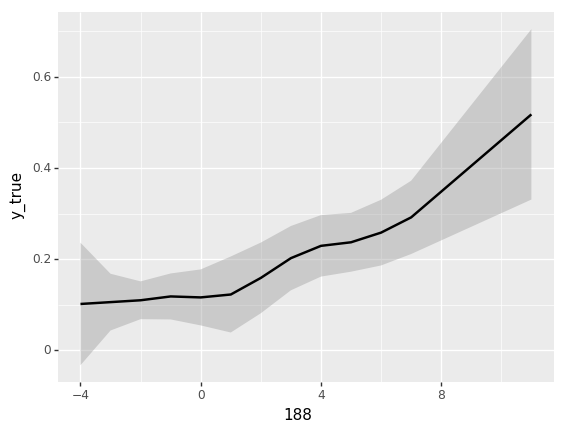

<ggplot: (-9223363270540634908)>

In [588]:
ggplot(x_all, aes('188', 'y_true'))+stat_smooth(se=True, method='loess')

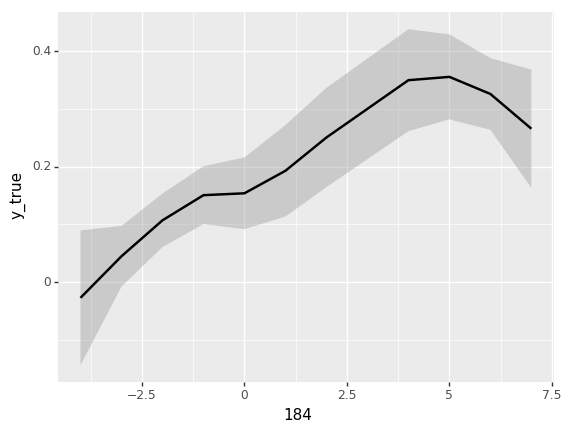

<ggplot: (8766299185640)>

In [589]:
ggplot(x_all, aes('184', 'y_true'))+stat_smooth(se=True, method='loess')

(500, 469)

In [47]:
x = get_sample(X_train, 400)

In [48]:
pdp.pdp_isolate

NameError: name 'pdp' is not defined

In [ ]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [49]:
plot_pdp("186")

NameError: name 'plot_pdp' is not defined

In [50]:
plot_pdp('186', clusters=5)

NameError: name 'plot_pdp' is not defined

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b6d0ca20>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f90b741a0b8>})

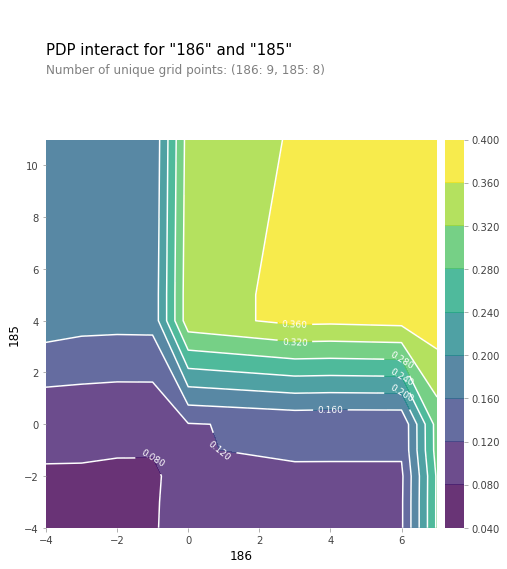

In [650]:
feats = ['186', '185']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

### Tree interpreter

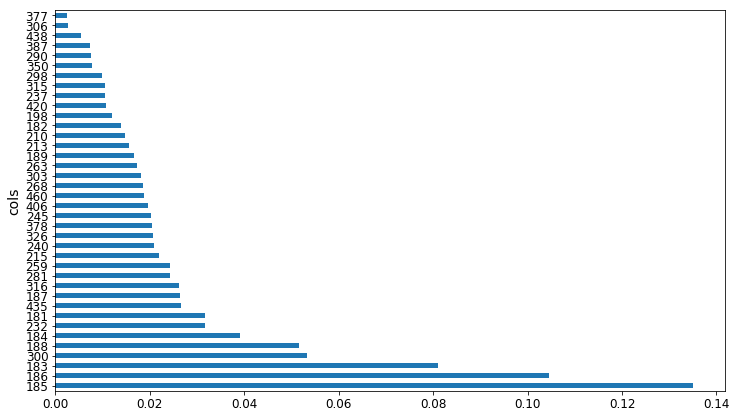

In [667]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

In [668]:
from treeinterpreter import treeinterpreter as ti

In [669]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [670]:
row = X_valid.values[None,0]; row

array([[ 7,  6, 11,  5, -1, -1,  7,  6,  6, -2,  5,  4,  4,  4,  4,  4,  6,  4,  6, -2,  6,  7,  4,  5,  5,
         4,  5,  5,  7,  4,  4,  5,  4,  5,  4,  1,  5,  5]])

In [671]:
prediction, bias, contributions = ti.predict(m, row)

In [672]:
prediction[0], bias[0]

(array([1.]), 0.1678)

In [673]:
idxs = np.argsort(contributions[0])

In [674]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('181', -1, -0.060416661271450775),
 ('210', 4, -0.013693313059454242),
 ('326', 4, -0.0004678654678654692),
 ('306', 1, 0.0),
 ('315', 7, 0.0),
 ('378', 5, 0.0),
 ('377', 4, 0.0),
 ('387', 4, 0.0007425742574257432),
 ('189', -2, 0.0009455665724654065),
 ('298', 4, 0.0014367816091954034),
 ('188', -1, 0.002072175258716056),
 ('406', 4, 0.006323575849437918),
 ('182', -2, 0.006960313953243691),
 ('290', 4, 0.007352475465206021),
 ('240', 5, 0.007501085167768014),
 ('187', 7, 0.008739030178755774),
 ('263', 6, 0.009096714455332212),
 ('198', 6, 0.009409177933232857),
 ('350', 5, 0.011856380602308536),
 ('420', 5, 0.01208555825338172),
 ('316', 5, 0.013305831855667851),
 ('435', 4, 0.013420937549444886),
 ('237', 7, 0.014068627450980392),
 ('245', 4, 0.01676685637254027),
 ('460', 4, 0.017227785190056737),
 ('303', 4, 0.01930610969092781),
 ('184', 6, 0.022619409467261153),
 ('268', 5, 0.02270658263305322),
 ('213', 6, 0.02749337401810468),
 ('215', 5, 0.031735537422820155),
 ('259', 6, 

In [675]:
contributions[0].sum()

0.8322

In [51]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 478 ms, sys: 78.5 ms, total: 557 ms
Wall time: 291 ms
1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid
[0.042879940830199074, 0.18571125941902408, 0.9867614368556701, 0.7516815625000001, 0.9460249282510451]


In [91]:
def stats(y_hat, y_true):
    #Pairwise comparison
    yhat = np.array(y_hat)
    y_true = np.array(y_true)
    yhat_binary = np.where(y_hat > 0.5, 1, 0)

    correct = yhat_binary == y_true
    auc = roc_auc_score(y_true, yhat)
    mcc = matthews_corrcoef(y_true, yhat_binary)
    avp = average_precision_score(y_true, yhat)

    print("Correct:", round(sum(correct) / len(y_true), 3))
    print("AUC", round(auc, 3))
    print("MCC", round(mcc, 3))
    print("AVP", round(avp, 3))

    print("\nTn, fp, fn, tp")
    print(metrics.confusion_matrix(y_true, yhat_binary))
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, yhat_binary).ravel()
    tpr = (tp / (tp+fn))
    tnr = (tn / (tn+fp))
    print("TPR:", round(tpr, 3))
    print("TNR:", round(tnr, 3))


In [92]:
y_pred = m.predict(X_valid)
y_true = y_valid.values

stats(y_pred, y_true)

Correct: 0.94
AUC 0.993
MCC 0.773
AVP 0.965

Tn, fp, fn, tp
[[245   5]
 [ 13  37]]
TPR: 0.74
TNR: 0.98


In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn import random_projection
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print("1. rmse: x/y train 2. rmse x/y valid 3. score x/y train 4. score x/y valid")
    print(res)